In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Task 3 and 4_Loan_Data.csv')
df = df[['fico_score','default']].copy()
df['fico_score'] = pd.to_numeric(df['fico_score'], errors='coerce').clip(300,850)
df['default'] = pd.to_numeric(df['default'], errors='coerce')
df = df.dropna().reset_index(drop=True)

In [3]:
# apply K-Means on FICO (5 clusters)
x = df[['fico_score']].values
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(x)

In [4]:
#  Map clusters → Ratings (1=best, 5=worst)
cluster_means = df.groupby('cluster')['fico_score'].mean().sort_values(ascending=False)
rating_map = {cluster: rating for rating, cluster in enumerate(cluster_means.index, start=1)}
df['rating'] = df['cluster'].map(rating_map)

In [5]:
#  Rating statistics (mean FICO & PD)
rating_stats = df.groupby('rating').agg({'fico_score':'mean','default':'mean'}).rename(columns={'default':'PD'})
display(rating_stats)


,fico_score,PD
rating,,
1,734.877804,0.044857
2,677.783599,0.091875
3,631.830043,0.159585
4,585.141947,0.282530
5,525.300226,0.511287


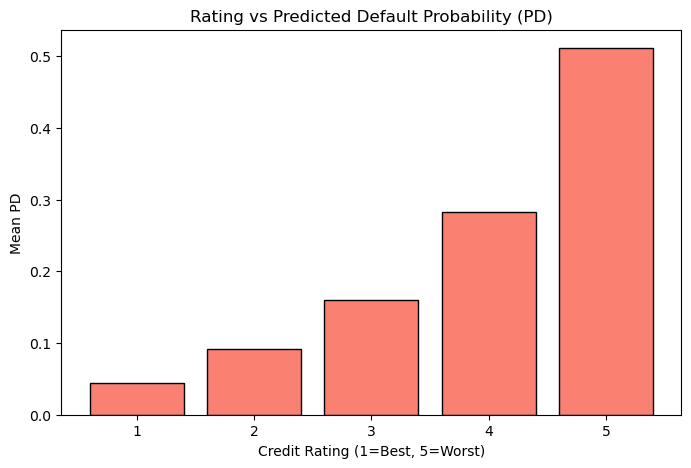

In [6]:
#  Bar plot: Rating vs PD
plt.figure(figsize=(8,5))
plt.bar(rating_stats.index, rating_stats['PD'], color='salmon', edgecolor='black')
plt.title('Rating vs Predicted Default Probability (PD)')
plt.xlabel('Credit Rating (1=Best, 5=Worst)')
plt.ylabel('Mean PD')
plt.show()


In [7]:
#  Cluster centroids → rating boundaries
centroids = pd.DataFrame({'cluster': range(5), 'fico_centroid': kmeans.cluster_centers_.flatten()})
centroids['rating'] = centroids['cluster'].map(rating_map)
display(centroids.sort_values('rating'))

,cluster,fico_centroid,rating
3,3,734.877804,1
1,1,677.783599,2
0,0,631.830043,3
4,4,585.141947,4
2,2,525.300226,5


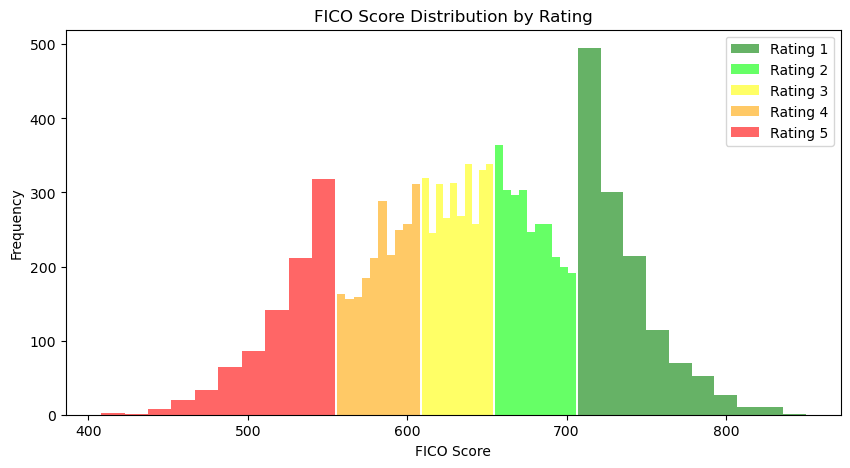

In [8]:
# 8) Color-coded histogram by rating
colors = {1:'green', 2:'lime', 3:'yellow', 4:'orange', 5:'red'}
plt.figure(figsize=(10,5))
for r in sorted(df['rating'].unique()):
    subset = df[df['rating']==r]
    plt.hist(subset['fico_score'], bins=10, color=colors[r], alpha=0.6, label=f'Rating {r}')
plt.title('FICO Score Distribution by Rating')
plt.xlabel('FICO Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [9]:
df[['fico_score','default','rating']].head()

,fico_score,default,rating
0,605,0,4
1,572,1,4
2,602,0,4
3,612,0,3
4,631,0,3
